# Tutorial for clustering of time series

based on: https://tslearn.readthedocs.io/en/latest/gen_modules/clustering/tslearn.clustering.TimeSeriesKMeans.html

## Install necessary modules

In [2]:
!pip install tslearn

     |████████████████████████████████| 552kB 2.8MB/s 
  Created wheel for tslearn: filename=tslearn-0.3.0-cp36-cp36m-linux_x86_64.whl size=679451 sha256=d6515ecf98c516660c4be16ded56e7ac1170f1fa3d4747eac9ac075abc00f4e5
  Stored in directory: /root/.cache/pip/wheels/e6/3e/d8/10df4ef030ee08b042b68be83559776d0200926d14bdf64206
Successfully built tslearn


## Import necessary modules

In [0]:
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

import matplotlib.pyplot as plt

## Create random 1-dimensional time series

the following code produces 50 different random walks of size 32

In [0]:
X = random_walks(n_ts = 50, sz = 32, d = 1, random_state = 1712)
X = TimeSeriesScalerMeanVariance().fit_transform(X)
sz = X.shape[1]

here is how the data should look like to be able to use this method: a list of list, which each point in the time series in its own list (as there is only one dimension per time point)

In [93]:
X

array([[[ 1.13387205],
        [ 1.78432375],
        [ 0.42517786],
        ...,
        [ 0.55079378],
        [-0.18232914],
        [-0.14810521]],

       [[ 0.0462367 ],
        [ 0.28103771],
        [-0.20791324],
        ...,
        [ 0.15215791],
        [-0.22360438],
        [ 0.94250282]],

       [[-0.54250592],
        [-1.19832818],
        [-1.40962532],
        ...,
        [ 1.008685  ],
        [ 1.16297419],
        [ 1.29508046]],

       ...,

       [[ 1.43680033],
        [ 0.33267126],
        [ 0.19458069],
        ...,
        [-0.78957743],
        [-0.30650883],
        [-0.37048798]],

       [[ 2.08735829],
        [ 1.2163281 ],
        [ 0.65548447],
        ...,
        [-1.10926841],
        [-1.25397829],
        [-1.29072749]],

       [[ 0.78058424],
        [ 1.39809314],
        [ 0.82867586],
        ...,
        [ 1.38074213],
        [ 1.27099517],
        [ 1.20815742]]])

## k-Means clustering of 1-dimensional time series

### With the euclidean metric

- Definition of the of the algorithm

In [94]:
km = TimeSeriesKMeans(n_clusters = 3, metric = "euclidean", max_iter = 5, random_state = 0).fit(X)
km.cluster_centers_.shape

(3, 32, 1)

- Plot of the clusters, with the cluster centers represented in red

Euclidean k-means


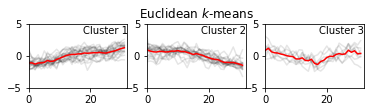

In [96]:
# Euclidean k-means
print("Euclidean k-means")
y_pred = km.fit_predict(X)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X[y_pred == yi]:
        plt.plot(xx.ravel(), "black", alpha = 0.1)
    plt.plot(km.cluster_centers_[yi].ravel(), "red")
    plt.xlim(0, sz)
    plt.ylim(-5, 5)
    plt.text(0.55, 0.85, "Cluster %d" % (yi + 1), transform = plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

### With the Dynamic Time Warping metric

- Definition of the algorithm

In [97]:
km_dba = TimeSeriesKMeans(n_clusters = 3, metric = "dtw", max_iter = 5, max_iter_barycenter = 5, random_state = 0).fit(X)
km_dba.cluster_centers_.shape

(3, 32, 1)

- Plot of the clusters, with the cluster centers in blue

DBA k-means


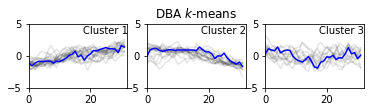

In [99]:
# DBA-k-means
print("DBA k-means")
y_pred = km_dba.fit_predict(X)

for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X[y_pred == yi]:
        plt.plot(xx.ravel(), "black", alpha = 0.1)
    plt.plot(km_dba.cluster_centers_[yi].ravel(), "blue")
    plt.xlim(0, sz)
    plt.ylim(-5, 5)
    plt.text(0.55, 0.85, "Cluster %d" % (yi + 1), transform = plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

### With the soft Dynamic Time Warping metric

- Definition of the algorithm

In [100]:
km_sdtw = TimeSeriesKMeans(n_clusters = 3, metric = "softdtw", max_iter = 5, max_iter_barycenter = 5, metric_params = {"gamma": 0.5}, random_state = 0).fit(X)
km_sdtw.cluster_centers_.shape

(3, 32, 1)

- Plot of the clusters, with the cluster centers in green

Soft-DTW k-means


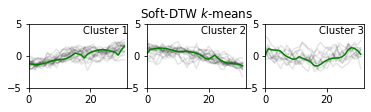

In [102]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
y_pred = km_sdtw.fit_predict(X)

for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X[y_pred == yi]:
        plt.plot(xx.ravel(), "black", alpha = 0.1)
    plt.plot(km_sdtw.cluster_centers_[yi].ravel(), "green")
    plt.xlim(0, sz)
    plt.ylim(-5, 5)
    plt.text(0.55, 0.85,"Cluster %d" % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

### Comparison of the three metrics

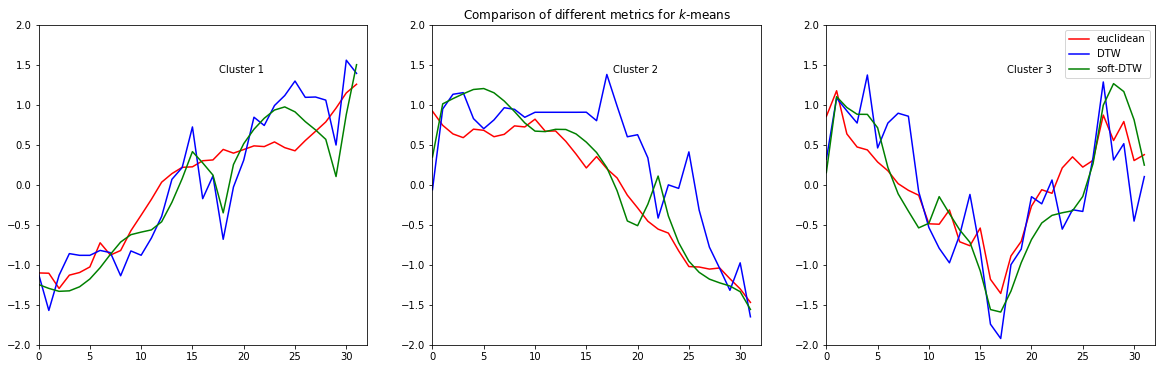

In [105]:
fig = plt.figure(figsize = (20, 20))

for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    plt.plot(km.cluster_centers_[yi].ravel(), "red", label = "euclidean")
    plt.plot(km_dba.cluster_centers_[yi].ravel(), "blue", label = "DTW")
    plt.plot(km_sdtw.cluster_centers_[yi].ravel(), "green", label = "soft-DTW")
    plt.xlim(0, sz)
    plt.ylim(-2, 2)
    plt.text(0.55, 0.85,"Cluster %d" % (yi + 1), transform = plt.gca().transAxes)
    if yi == 1:
        plt.title("Comparison of different metrics for $k$-means")

plt.legend()
None

## k-Means clustering of 1-dimensional time series, with prior transformation to correct format

In [117]:
X_bis = [[1, 2, 3, 4], [1, 2, 3], [2, 5, 6, 7, 8, 9]]
X_bis

[[1, 2, 3, 4], [1, 2, 3], [2, 5, 6, 7, 8, 9]]

In [118]:
X_bis = to_time_series_dataset(X_bis)
X_bis

array([[[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [nan],
        [nan]],

       [[ 1.],
        [ 2.],
        [ 3.],
        [nan],
        [nan],
        [nan]],

       [[ 2.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.]]])

In [115]:
X_bis = TimeSeriesScalerMeanVariance().fit_transform(X_bis)
sz_bis = X_bis.shape[1]
km_dba_bis = TimeSeriesKMeans(n_clusters = 2, max_iter = 5, metric = "dtw", random_state = 0).fit(X_bis)
km_dba_bis.cluster_centers_.shape

(2, 3, 1)

DBA k-means


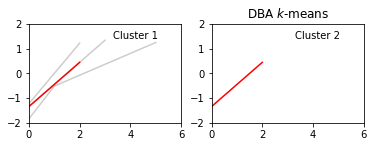

In [109]:
# DBA-k-means
print("DBA k-means")
y_pred = km_dba_bis.fit_predict(X_bis)

for yi in range(2):
    plt.subplot(2, 2, 3 + yi)
    for xx in X_bis[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha = 0.2)
    plt.plot(km_dba_bis.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz_bis)
    plt.ylim(-2, 2)
    plt.text(0.55, 0.85, "Cluster %d" % (yi + 1), transform = plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

## k-Means clustering of 2-dimensional time series

In [0]:
X_2d = random_walks(n_ts = 50, sz = 32, d = 2, random_state = 1712)
X_2d = TimeSeriesScalerMeanVariance().fit_transform(X_2d)
sz_2d = X_2d.shape[1]

here is how the data should look like to be able to use this method: a list of list, which each pair of points in the time series in their own list (as there are two dimensions per time point)

In [89]:
X_2d

array([[[ 1.67689396,  0.52113656],
        [ 0.33374402, -0.43967981],
        [ 1.58607642,  0.4399214 ],
        ...,
        [-1.02413706, -1.34610105],
        [ 0.07721443, -0.31834335],
        [-0.51045139,  1.5746052 ]],

       [[-0.82713362, -1.5663383 ],
        [-0.95127102, -1.27443014],
        [-1.218581  , -1.29476337],
        ...,
        [ 1.03294186,  1.81734562],
        [ 1.07852586,  2.12420051],
        [ 1.23227923,  2.22191767]],

       [[ 0.89618711, -2.10477361],
        [ 0.36571932, -2.01430608],
        [ 0.72429024, -2.16165026],
        ...,
        [-1.77560756,  0.04712755],
        [-1.6422208 ,  0.45348793],
        [-2.4028276 ,  0.33946569]],

       ...,

       [[ 1.52876856, -1.46716909],
        [ 0.79602834, -1.42595129],
        [ 0.96307775, -1.32988585],
        ...,
        [-0.40491026,  0.01181578],
        [ 0.21369346,  0.16526862],
        [ 0.53460904,  0.02558279]],

       [[ 0.92939521, -3.35038456],
        [ 1.19396867, -2.19

### With the Dynamic Time Warping metric

In [90]:
km_dba_2d = TimeSeriesKMeans(n_clusters = 3, metric = "dtw", max_iter = 5, max_iter_barycenter = 5, random_state = 0).fit(X_2d)
km_dba_2d.cluster_centers_.shape

(3, 32, 2)

DBA k-means


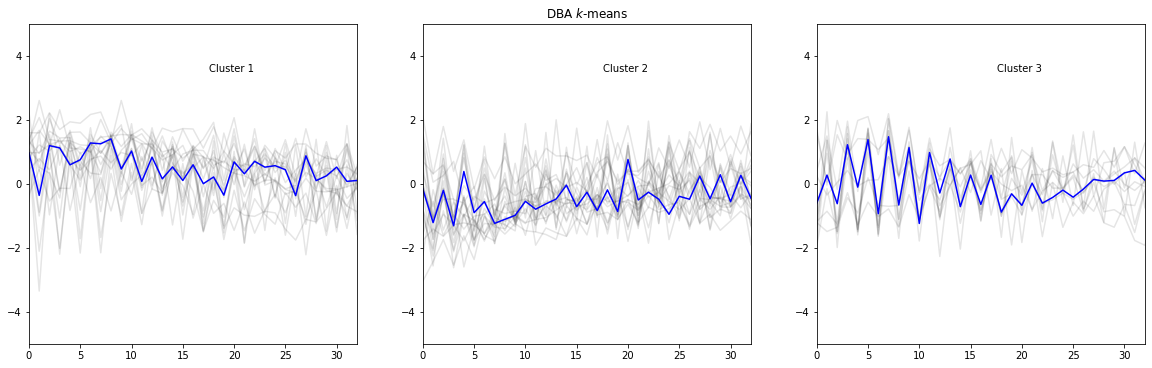

In [111]:
fig = plt.figure(figsize = (20, 20))

# DBA-k-means
print("DBA k-means")
y_pred = km_dba_2d.fit_predict(X_2d)

for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_2d[y_pred == yi]:
        plt.plot(xx.ravel(), "black", alpha = 0.1)
    plt.plot(km_dba_2d.cluster_centers_[yi].ravel(), "blue")
    plt.xlim(0, sz)
    plt.ylim(-5, 5)
    plt.text(0.55, 0.85, "Cluster %d" % (yi + 1), transform = plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")